# Vehicle Car Dekho Price Prediction - Regression Model

### Data Set Description:

The Vehicle Car Dheko project aims to develop an intelligent predictive analysis and recommendation system using machine learning techniques. The project focuses on leveraging a comprehensive dataset containing various attributes of vehicles, such as make, model, year, price, mileage, and features. By applying advanced machine learning algorithms, the system will provide valuable insights and personalized recommendations to potential buyers, enabling them to make informed decisions when purchasing a car.

### Data Fields:

| **Variable Name** | **Description** |
|--|--|
|name|name of the car|
|year|year in which car was bought|
|selling_price|selling price of the car|
|km_driven|number of kilometers the car is driven|
|fuel|fuel type of the car|
|seller_type|tells if car is sold by individual or dealer|
|transmission|Gear transmission of the car (Automatic/Manual)|
|owner|number of previous owners|
|mileage|mileage of the car|
|engine|engine capacity of the car|
|max_power|max power of engine|
|torque|torque of the car|
|seats|number of seats in the car|


### Goal:

Predicting the Price of Used Cars

In [1361]:
# Importing Required Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [1362]:
import io 
%cd "D:\IMR\CapStone Project\Vehicle"

D:\IMR\CapStone Project\Vehicle


In [1363]:
vehicle = pd.read_csv("Car details v3_cleaned.csv")

In [1364]:
# Checking columns and it's datatype
vehicle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           8128 non-null   object
 1   year           8128 non-null   int64 
 2   selling_price  8128 non-null   int64 
 3   km_driven      8128 non-null   int64 
 4   fuel           8128 non-null   object
 5   seller_type    8128 non-null   object
 6   transmission   8128 non-null   object
 7   owner          8128 non-null   object
 8   mileage        7907 non-null   object
 9   engine         7907 non-null   object
 10  max_power      7913 non-null   object
 11  torque         7641 non-null   object
dtypes: int64(3), object(9)
memory usage: 762.1+ KB


In [1365]:
vehicle.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4 kmpl,1248 CC,74 bhp,2000rpm
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14 kmpl,1498 CC,103.52 bhp,1500-2500rpm
2,Honda City 2017-2020 EXi,2006,158000,140000,Petrol,Individual,Manual,Third Owner,17.7 kmpl,1497 CC,78 bhp,"2,700(kgm"
3,Hyundai i20 Sportz Diesel,2010,225000,127000,Diesel,Individual,Manual,First Owner,23.0 kmpl,1396 CC,90 bhp,NaN
4,Maruti Swift VXI BSIII,2007,130000,120000,Petrol,Individual,Manual,First Owner,16.1 kmpl,1298 CC,88.2 bhp,"4,500(kgm"


In [1366]:
vehicle.mileage.unique()

array(['23.4 kmpl', '21.14 kmpl', '17.7 kmpl', '23.0 kmpl', '16.1 kmpl',
       '20.14 kmpl', '17.3 km/kg', '23.59 kmpl', '20.0 kmpl',
       '19.01 kmpl', '17.3 kmpl', '19.3 kmpl', nan, '18.9 kmpl',
       '18.15 kmpl', '24.52 kmpl', '19.7 kmpl', '22.54 kmpl', '21.0 kmpl',
       '25.5 kmpl', '26.59 kmpl', '21.5 kmpl', '20.3 kmpl', '21.4 kmpl',
       '24.7 kmpl', '18.2 kmpl', '16.8 kmpl', '24.3 kmpl', '14.0 kmpl',
       '18.6 kmpl', '33.44 km/kg', '23.95 kmpl', '17.0 kmpl',
       '20.63 kmpl', '13.93 kmpl', '16.0 kmpl', '17.8 kmpl', '18.5 kmpl',
       '12.55 kmpl', '12.99 kmpl', '14.8 kmpl', '13.5 kmpl', '26.0 kmpl',
       '20.65 kmpl', '27.3 kmpl', '11.36 kmpl', '17.68 kmpl',
       '14.28 kmpl', '18.53 kmpl', '14.84 kmpl', '21.12 kmpl',
       '20.36 kmpl', '21.27 kmpl', '18.16 kmpl', '22.0 kmpl', '25.1 kmpl',
       '20.51 kmpl', '21.66 kmpl', '25.2 kmpl', '22.9 kmpl', '16.02 kmpl',
       '20.54 kmpl', '22.77 kmpl', '15.71 kmpl', '23.1 kmpl',
       '19.02 kmpl', '19.81 kmpl'

In [1367]:
# Cleaning the rows - "kmpl","km/kg"," "(whitespaces) in mileage 
vehicle.mileage = vehicle.mileage.str.replace("kmpl","")

In [1368]:
vehicle.mileage = vehicle.mileage.str.replace("km/kg","")

In [1369]:
vehicle.mileage = vehicle.mileage.str.replace(" ","")

In [1370]:
vehicle.head(2)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4,1248 CC,74 bhp,2000rpm
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498 CC,103.52 bhp,1500-2500rpm


In [1371]:
# Cleaning the rows - "CC" in engine

In [1372]:
vehicle.engine = vehicle.engine.str.replace("CC","")

In [1373]:
vehicle.head(2)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4,1248,74 bhp,2000rpm
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52 bhp,1500-2500rpm


In [1374]:
# Cleaning the rows - "bhp" , " "(whitespaces) in max_power
vehicle.max_power = vehicle.max_power.str.replace("bhp","")

In [1375]:
vehicle.max_power = vehicle.max_power.str.replace(" ","")

In [1376]:
vehicle.head(2)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4,1248,74,2000rpm
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,1500-2500rpm


In [1377]:
vehicle.torque.unique()

array([' 2000rpm', ' 1500-2500rpm', ' 2,700(kgm', nan, ' 4,500(kgm',
       ' 4000rpm', ' 2500rpm', ' 1800-2400rpm', ' 2250rpm', ' 4500rpm',
       ' 3500rpm', ' 3500-3600rpm', ' 1750rpm', ' 3000rpm',
       ' 1500-2750rpm', ' 4850rpm', ' 1700-2700rpm', ' 1750-2500rpm',
       ' 4600rpm', ' 4800rpm', ' 1400-3400rpm', ' 1250-4000rpm',
       ' 2000-2500rpm', ' 4400rpm', ' 1200-3400rpm', ' 1200-3600rpm',
       ' 1750-3000rpm', ' 1400-2800rpm', ' 1500-3000rpm', ' 1750-3250rpm',
       ' 1350-4600rpm', ' 3750rpm', ' 3800rpm', ' 4200rpm',
       ' 1800-2800rpm', ' 4250rpm', ' 1500~4500rpm', ' 1750-2800rpm',
       ' 1900-2750rpm', ' 1900rpm', ' 3600-5200rpm', ' 4300rpm',
       ' 1750-2250rpm', ' 1600-2400rpm', ' 1250-5000rpm', ' 1600-1800rpm',
       ' 1600-3600rpm', ' 1750-2750rpm', ' 1600rpm', ' 4700rpm',
       ' 1750-4000rpm', ' 1200-4000rpm', ' 1200-1400rpm', ' 1740rpm',
       ' 3000-4300rpm', ' 3200rpm', ' 4386rpm', ' 1500-4000rpm',
       ' 1800-3250rpm', ' 1600-2800rpm', ' 3,500(

In [1378]:
# Cleaning the rows - "rpm" , "(kgm" , "(NM" , "+/" , " "(whitespaces), "," , "~" ,  in max_power
vehicle.torque = vehicle.torque.str.replace("rpm","")

In [1379]:
vehicle.torque = vehicle.torque.str.replace("(kgm","")

In [1380]:
vehicle.torque = vehicle.torque.str.replace("(NM","")

In [1381]:
vehicle.torque = vehicle.torque.str.replace("+/","")

In [1382]:
vehicle.torque = vehicle.torque.str.replace(" ","")

In [1383]:
vehicle.torque = vehicle.torque.str.replace(",","")

In [1384]:
vehicle.torque = vehicle.torque.str.replace("~","")

In [1385]:
# Calculating mean of the hyphen seperated numbers
vehicle.torque = vehicle.torque.str.split('-', expand=True).astype(float).mean(axis=1)

In [1386]:
vehicle.head(2)

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,mileage,engine,max_power,torque
0,Maruti Swift Dzire VDI,2014,450000,145500,Diesel,Individual,Manual,First Owner,23.4,1248,74,2000.0
1,Skoda Rapid 1.5 TDI Ambition,2014,370000,120000,Diesel,Individual,Manual,Second Owner,21.14,1498,103.52,2000.0


In [1387]:
# checking for missing values
vehicle.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage          221
engine           221
max_power        215
torque           487
dtype: int64

In [1388]:
# filling null values in Mileage , Engine, Max_power , torque

In [1389]:
# Mileage -
vehicle.mileage = vehicle.mileage.astype(float)

In [1390]:
vehicle.mileage.describe()

count    7907.000000
mean       19.418783
std         4.037145
min         0.000000
25%        16.780000
50%        19.300000
75%        22.320000
max        42.000000
Name: mileage, dtype: float64

In [1391]:
vehicle.mileage = vehicle.mileage.fillna(vehicle.mileage.mean())

In [1392]:
vehicle.mileage.isnull().sum()

0

In [1393]:
# Engine - 
vehicle.engine = vehicle.engine.astype(float)

In [1394]:
vehicle.engine.describe()

count    7907.000000
mean     1458.625016
std       503.916303
min       624.000000
25%      1197.000000
50%      1248.000000
75%      1582.000000
max      3604.000000
Name: engine, dtype: float64

In [1395]:
# as mean and meadian are not so close 
# there is a mean distrotion that means we have so many outliers 
# so we choose median over mean
vehicle.engine = vehicle.engine.fillna(vehicle.engine.median())

In [1396]:
vehicle.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage            0
engine             0
max_power        215
torque           487
dtype: int64

In [1397]:
# max_power 
vehicle.max_power = pd.to_numeric(vehicle.max_power, errors='coerce', downcast='float')

In [1398]:
vehicle.max_power.describe()

count    7912.000000
mean       91.517914
std        35.822365
min         0.000000
25%        68.050003
50%        82.000000
75%       102.000000
max       400.000000
Name: max_power, dtype: float64

In [1399]:
vehicle.max_power = vehicle.max_power.fillna(vehicle.max_power.median())

In [1400]:
vehicle.isnull().sum()

name               0
year               0
selling_price      0
km_driven          0
fuel               0
seller_type        0
transmission       0
owner              0
mileage            0
engine             0
max_power          0
torque           487
dtype: int64

In [1402]:
# torque 
vehicle.torque.describe()

count    7.641000e+03
mean     6.824147e+03
std      2.426905e+05
min      1.300000e+03
25%      2.000000e+03
50%      2.400000e+03
75%      4.000000e+03
max      1.500450e+07
Name: torque, dtype: float64

In [1403]:
vehicle.torque = vehicle.torque.fillna(vehicle.torque.median())

In [1404]:
vehicle.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
mileage          0
engine           0
max_power        0
torque           0
dtype: int64

In [1405]:
# All missing values are imputed

## Data Visualization

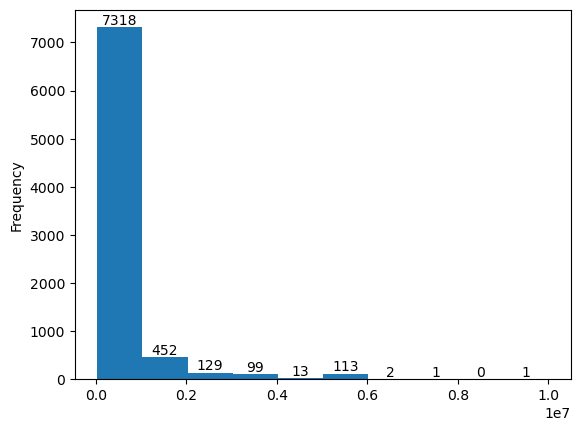

In [1134]:
ax=vehicle.selling_price.plot(kind="hist")
for i in ax.containers:
    ax.bar_label(i,label_type="edge")

<Axes: >

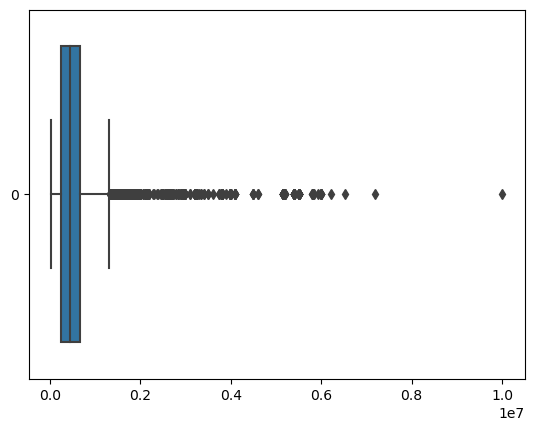

In [1135]:
sns.boxplot(vehicle.selling_price,orient="h")

<Axes: xlabel='selling_price', ylabel='Density'>

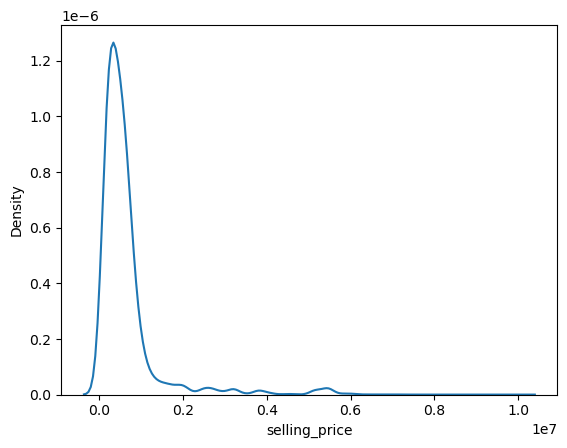

In [1136]:
sns.kdeplot(vehicle.selling_price)

<Figure size 3000x1500 with 0 Axes>

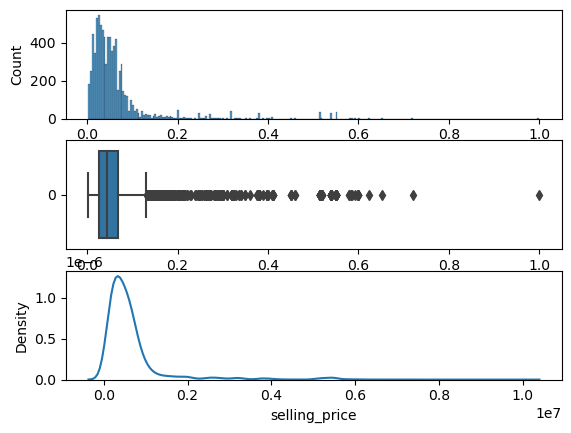

In [1137]:
plt.figure(figsize=(30,15))
fig,ax=plt.subplots(3,1)
sns.histplot(vehicle.selling_price,ax=ax[0])
sns.boxplot(vehicle.selling_price,orient="h",ax=ax[1])
sns.kdeplot(vehicle.selling_price,ax=ax[2])
plt.show()

#### Dependent Varibale (selling_price) is positively skewed, <br> in order to bring it to normally distributed we use logarithmic transformation<br>

<Figure size 3000x1500 with 0 Axes>

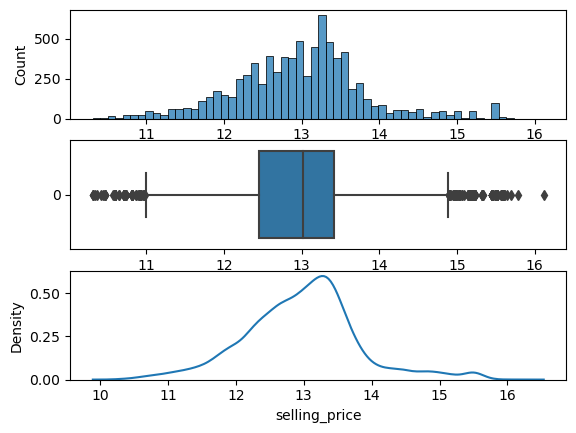

In [1320]:
plt.figure(figsize=(30,15))
fig,ax=plt.subplots(3,1)
sns.histplot(np.log(vehicle.selling_price),ax=ax[0])
sns.boxplot(np.log(vehicle.selling_price),orient="h",ax=ax[1])
sns.kdeplot(np.log(vehicle.selling_price),ax=ax[2])
plt.show()

In [1138]:
vehicle.selling_price.max()

10000000

In [1139]:
# Frequency Distribution Table
pd.cut(vehicle.selling_price,bins=[500000,1000000,1500000,2000000,2500000,3000000,10000000]).value_counts().sort_index()

selling_price
(500000, 1000000]      2668
(1000000, 1500000]      292
(1500000, 2000000]      171
(2000000, 2500000]       59
(2500000, 3000000]       70
(3000000, 10000000]     229
Name: count, dtype: int64

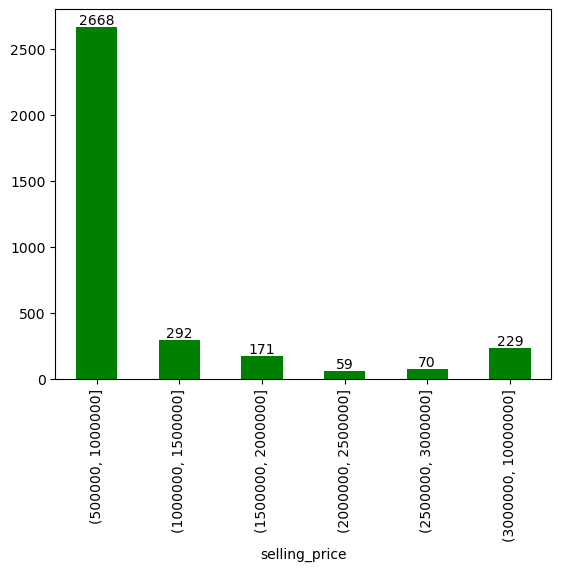

In [1140]:
# Bar Plot for Frequency Distribution Table
ax=pd.cut(vehicle.selling_price,bins=[500000,1000000,1500000,2000000,2500000,3000000,10000000]
         ).value_counts().sort_index().plot(kind="bar",color="green")

for i in ax.containers :
    ax.bar_label(i)
plt.show()

<Axes: >

<Figure size 2000x2000 with 0 Axes>

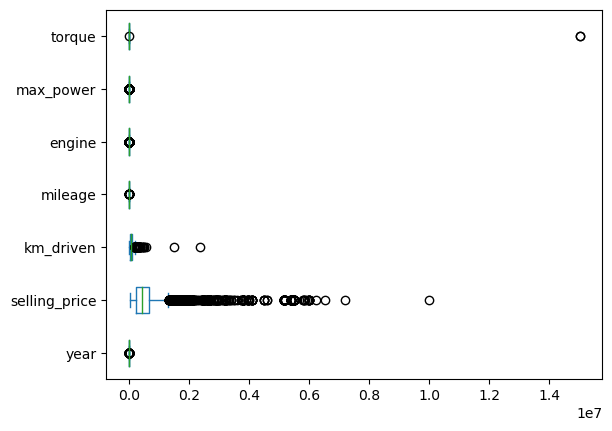

In [1141]:
plt.figure(figsize=(20,20))
vehicle.plot(kind="box",vert=False)

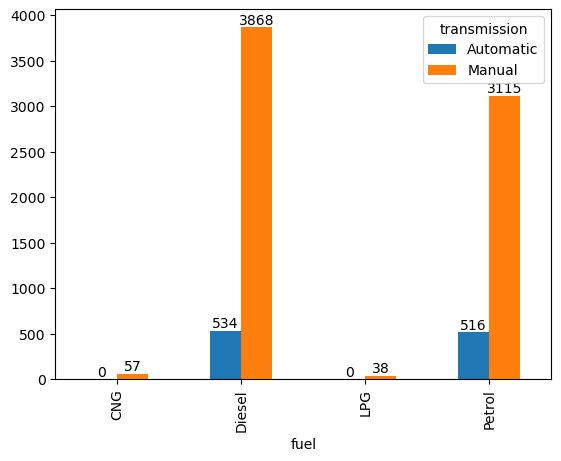

In [1142]:
ax = pd.crosstab(vehicle.fuel,vehicle.transmission).plot(kind="bar")

for i in ax.containers :
    ax.bar_label(i)

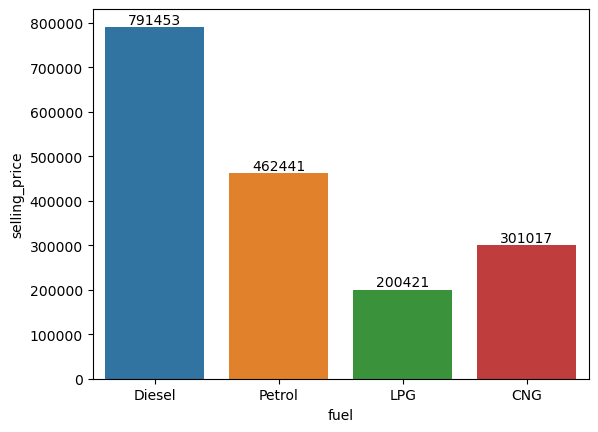

In [1143]:
ax = sns.barplot(vehicle,x="fuel",y="selling_price",errorbar=None)
ax.bar_label(ax.containers[0])
plt.show()

<Axes: ylabel='count'>

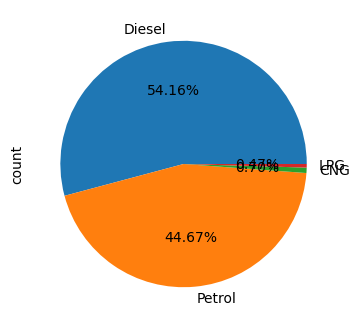

In [1144]:
vehicle.fuel.value_counts().plot(kind="pie",autopct="%.2f%%",figsize=(4,4))

## Data Aggregation

In [1145]:
vehicle.selling_price.groupby(vehicle.fuel).mean()

fuel
CNG       301017.491228
Diesel    791452.921627
LPG       200421.052632
Petrol    462441.061691
Name: selling_price, dtype: float64

In [1146]:
vehicle.selling_price.groupby(vehicle.transmission).mean()

transmission
Automatic    1.870828e+06
Manual       4.554259e+05
Name: selling_price, dtype: float64

In [1147]:
vehicle.mileage.groupby(vehicle.fuel).mean()

fuel
CNG       23.832546
Diesel    19.637386
LPG       18.643588
Petrol    19.092587
Name: mileage, dtype: float64

In [1148]:
pd.crosstab(vehicle.fuel,vehicle.transmission)

transmission,Automatic,Manual
fuel,,
CNG,0,57
Diesel,534,3868
LPG,0,38
Petrol,516,3115


In [1149]:
pd.crosstab(vehicle.fuel,vehicle.owner)

owner,First Owner,Fourth & Above Owner,Second Owner,Test Drive Car,Third Owner
fuel,,,,,
CNG,34,2,18,0,3
Diesel,2804,88,1223,1,286
LPG,17,2,14,0,5
Petrol,2434,82,850,4,261


In [1150]:
vehicle.torque.groupby(vehicle.fuel).mean()

fuel
CNG        3223.684211
Diesel     2136.379487
LPG        3581.578947
Petrol    12004.381988
Name: torque, dtype: float64

## Hypothesis Testing :

In [1151]:
#Test Null Average Selling_price of diff fuel cars
vehicle.selling_price.groupby(vehicle.fuel).mean()

fuel
CNG       301017.491228
Diesel    791452.921627
LPG       200421.052632
Petrol    462441.061691
Name: selling_price, dtype: float64

In [1152]:
# As we have more than 2 levels we use Anova test (f_oneway)

In [1153]:
cng = vehicle[vehicle.fuel == "CNG"]
diesel = vehicle[vehicle.fuel == "Diesel"]
lpg = vehicle[vehicle.fuel == "LPG"]
petrol = vehicle[vehicle.fuel == "Petrol"]

In [1154]:
from scipy.stats import f_oneway

In [1155]:
f_oneway(cng.selling_price,diesel.selling_price,lpg.selling_price,petrol.selling_price)
# Since pvalue = 7.768067697277526e-78 is lessthan 0.05, Reject Null Hypothesis

F_onewayResult(statistic=122.88062883888716, pvalue=7.768067697277526e-78)

Null:There is no significante difference Average Selling_price of cng,diesel,lpg,petrol.<br>
Alternate:There is a significante difference between Average Selling_price of cng,diesel,lpg,petrol .<br>

In [1156]:
#Test Null Average Selling_price of diff Transmission
vehicle.selling_price.groupby(vehicle.transmission).mean()

transmission
Automatic    1.870828e+06
Manual       4.554259e+05
Name: selling_price, dtype: float64

In [1157]:
vehicle.selling_price.groupby(vehicle.transmission).var()

transmission
Automatic    2.691349e+12
Manual       8.872370e+10
Name: selling_price, dtype: float64

In [1158]:
automatic = vehicle[vehicle.transmission == "Automatic"]
manual = vehicle[vehicle.transmission == "Manual"]

In [1159]:
# As we have exactly 2 levels we use ttest
from scipy.stats import ttest_ind

In [1160]:
ttest_ind(automatic.selling_price,manual.selling_price,equal_var=False)
# Since pvalue=8.531946079710315e-129 is less than 0.05, reject Null Hypothesis

TtestResult(statistic=27.888813193478946, pvalue=8.531946079710315e-129, df=1059.2814874514092)

In [1161]:
#Test Null No Association between fuel and transmission
pd.crosstab(vehicle.fuel,vehicle.transmission)

transmission,Automatic,Manual
fuel,,
CNG,0,57
Diesel,534,3868
LPG,0,38
Petrol,516,3115


In [1162]:
from scipy.stats import chi2_contingency

Null - There is no Association between fuel and Transmission<br>
Alt - There is Association between fuel and Transmission<br>

In [1163]:
chi2_contingency(pd.crosstab(vehicle.fuel,vehicle.transmission))
# since pvalue = 6.801498516561924e-05 is less than 0.05, Reject Null Hypothesis

Chi2ContingencyResult(statistic=21.912764347384904, pvalue=6.801498516561924e-05, dof=3, expected_freq=array([[   7.36343504,   49.63656496],
       [ 568.66387795, 3833.33612205],
       [   4.90895669,   33.09104331],
       [ 469.06373031, 3161.93626969]]))

## Data PreProcessing :

In [1164]:
vehicle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8128 entries, 0 to 8127
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   name           8128 non-null   object 
 1   year           8128 non-null   int64  
 2   selling_price  8128 non-null   int64  
 3   km_driven      8128 non-null   int64  
 4   fuel           8128 non-null   object 
 5   seller_type    8128 non-null   object 
 6   transmission   8128 non-null   object 
 7   owner          8128 non-null   object 
 8   mileage        8128 non-null   float64
 9   engine         8128 non-null   float64
 10  max_power      8128 non-null   float32
 11  torque         8128 non-null   float64
dtypes: float32(1), float64(3), int64(3), object(5)
memory usage: 730.4+ KB


In [1165]:
# converting year into date data type
vehicle.year = pd.to_datetime(vehicle.year)

In [1166]:
vehicle.year = vehicle.year.dt.date

In [1167]:
# Splitting
numcols = vehicle.select_dtypes(include=np.number)
objcols = vehicle.select_dtypes(include=["object"])

In [1168]:
numcols.columns

Index(['selling_price', 'km_driven', 'mileage', 'engine', 'max_power',
       'torque'],
      dtype='object')

In [1169]:
objcols["year"] = vehicle.year

In [1170]:
objcols.columns

Index(['name', 'year', 'fuel', 'seller_type', 'transmission', 'owner'], dtype='object')

In [1171]:
print(numcols.shape)
print(objcols.shape)

(8128, 6)
(8128, 6)


In [1172]:
numcols.head(2)

,selling_price,km_driven,mileage,engine,max_power,torque
0,450000,145500,23.40,1248.0,74.000000,2000.0
1,370000,120000,21.14,1498.0,103.519997,2000.0


In [1173]:
y = numcols.selling_price

In [1174]:
numcols = numcols.drop("selling_price",axis=1)

In [1175]:
numcols.describe()

,km_driven,mileage,engine,max_power,torque
count,8.128000e+03,8128.000000,8128.00000,8128.000000,8.128000e+03
mean,6.981951e+04,19.418783,1452.89813,91.264977,6.559068e+03
std,5.655055e+04,3.981875,498.19672,35.376476,2.353090e+05
min,1.000000e+00,0.000000,624.00000,0.000000,1.300000e+03
25%,3.500000e+04,16.800000,1197.00000,68.099998,2.125000e+03
50%,6.000000e+04,19.418783,1248.00000,82.000000,2.400000e+03
75%,9.800000e+04,22.277500,1582.00000,101.250000,3.800000e+03
max,2.360457e+06,42.000000,3604.00000,400.000000,1.500450e+07


In [1176]:
numcols.corr()

,km_driven,mileage,engine,max_power,torque
km_driven,1.000000,-0.171426,0.198911,-0.040599,0.012107
mileage,-0.171426,1.000000,-0.574469,-0.373165,-0.020520
engine,0.198911,-0.574469,1.000000,0.703612,0.009482
max_power,-0.040599,-0.373165,0.703612,1.000000,0.029886
torque,0.012107,-0.020520,0.009482,0.029886,1.000000


<Axes: >

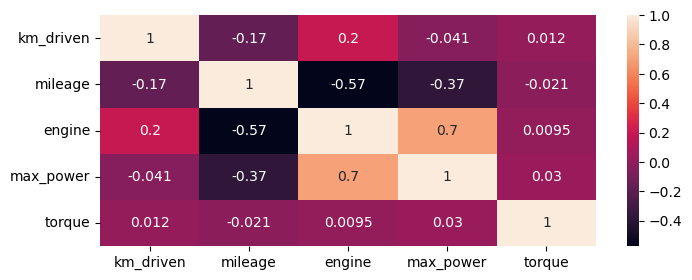

In [1177]:
plt.figure(figsize=(8,3))
sns.heatmap(numcols.corr(),annot=True)

<Axes: >

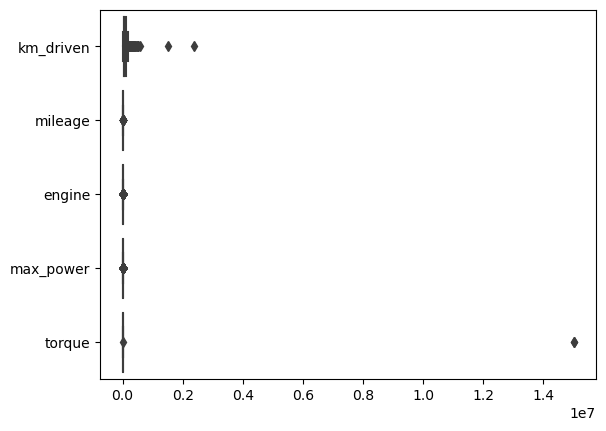

In [1178]:
sns.boxplot(numcols,orient="h")

In [1179]:
# We have extreame Outliers let's remove them

In [1180]:
# Calculating the first quartile (Q1) and third quartile (Q3)
Q1 = numcols.quantile(0.25)
Q3 = numcols.quantile(0.75)

# Calculating the IQR (Interquartile Range)
IQR = Q3 - Q1

# lower and upper bounds for extreme outliers
lower_bound = Q1 - 3 * IQR
upper_bound = Q3 + 3 * IQR

# Removing rows with extreme outliers
numcols = numcols[(numcols >= lower_bound) & (numcols <= upper_bound)]


<Axes: >

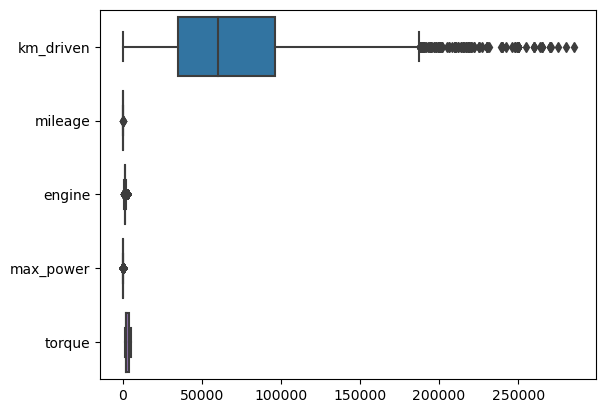

In [1181]:
sns.boxplot(numcols,orient="h")

In [1182]:
numcols.isnull().sum()

km_driven     31
mileage       18
engine       146
max_power     90
torque         3
dtype: int64

In [1183]:
numcols.km_driven.unique()

array([1.45500e+05, 1.20000e+05, 1.40000e+05, 1.27000e+05, 4.50000e+04,
       1.75000e+05, 5.00000e+03, 9.00000e+04, 1.69000e+05, 6.80000e+04,
       1.00000e+05, 8.00000e+04, 4.00000e+04, 7.00000e+04, 5.30000e+04,
       5.00000e+04, 7.20000e+04, 3.50000e+04, 2.80000e+04, 2.50000e+04,
       2.38800e+03, 1.62000e+04, 1.00000e+04, 1.50000e+04, 4.20000e+04,
       6.00000e+04, 7.60000e+04, 2.89000e+04, 8.63000e+04, 2.33000e+04,
       3.26000e+04, 1.03000e+04, 7.70000e+04, 9.90000e+04, 2.78000e+04,
       4.98000e+04, 1.51000e+05, 5.47000e+04, 6.40000e+04, 6.30000e+04,
       1.27700e+05, 3.39000e+04, 5.90000e+04, 1.10000e+05, 1.47000e+05,
       3.00000e+04, 1.35000e+05, 9.85000e+03, 7.80000e+04, 1.70000e+05,
       4.90000e+04, 3.20000e+04, 3.80000e+04, 4.40000e+04, 1.20000e+04,
       5.55000e+04, 6.15000e+04, 1.50000e+05, 3.78000e+04, 1.14000e+05,
       4.80000e+04, 6.90000e+04, 1.30000e+04, 7.61390e+04, 6.50000e+04,
       1.30300e+03, 3.18000e+04, 2.00000e+04, 1.70000e+04, 2.100

In [1184]:
numcols.km_driven.describe()

count      8097.000000
mean      68341.697048
std       44687.518378
min           1.000000
25%       35000.000000
50%       60000.000000
75%       96000.000000
max      285000.000000
Name: km_driven, dtype: float64

In [1185]:
numcols.km_driven = numcols.km_driven.fillna(numcols.km_driven.median())

In [1186]:
numcols.mileage.unique()

array([23.4       , 21.14      , 17.7       , 23.        , 16.1       ,
       20.14      , 17.3       , 23.59      , 20.        , 19.01      ,
       19.3       , 19.41878336, 18.9       , 18.15      , 24.52      ,
       19.7       , 22.54      , 21.        , 25.5       , 26.59      ,
       21.5       , 20.3       , 21.4       , 24.7       , 18.2       ,
       16.8       , 24.3       , 14.        , 18.6       , 33.44      ,
       23.95      , 17.        , 20.63      , 13.93      , 16.        ,
       17.8       , 18.5       , 12.55      , 12.99      , 14.8       ,
       13.5       , 26.        , 20.65      , 27.3       , 11.36      ,
       17.68      , 14.28      , 18.53      , 14.84      , 21.12      ,
       20.36      , 21.27      , 18.16      , 22.        , 25.1       ,
       20.51      , 21.66      , 25.2       , 22.9       , 16.02      ,
       20.54      , 22.77      , 15.71      , 23.1       , 19.02      ,
       19.81      , 26.2       , 16.47      , 15.04      , 19.1 

In [1187]:
numcols.mileage.describe()

count    8110.000000
mean       19.456704
std         3.877584
min         9.000000
25%        16.800000
50%        19.418783
75%        22.300000
max        33.440000
Name: mileage, dtype: float64

In [1188]:
numcols.mileage = numcols.mileage.fillna(numcols.mileage.median())

In [1189]:
numcols.engine.unique()

array([1248., 1498., 1497., 1396., 1298., 1197., 1061.,  796., 1364.,
       1399., 1461.,  993., 1198., 1199.,  998., 1591., 2179., 1368.,
         nan, 2494., 2143., 2477., 1462., 1968., 1798., 1196., 1373.,
       1598., 1998., 1086., 1194., 1172., 1405., 1582.,  999., 2487.,
       1999., 1995., 1451., 1969., 2497., 1797., 1991., 2362., 1493.,
       1599., 1341., 1794.,  799., 1193., 2696., 1495., 1186., 1047.,
       2498., 2523., 1120.,  624., 1496., 1984., 2354.,  814.,  793.,
       1799.,  936., 1956., 1997., 1499., 1948., 2489., 2499., 2609.,
       1150., 1994., 1388., 1527., 2199.,  995., 1586., 1390.,  909.,
       2393., 1339., 2092., 1595., 2496., 1596., 1597., 2596., 2148.,
       1299., 1590., 2231., 2694., 2200., 1795., 1896., 1796., 1422.,
       1489., 2359., 2197., 1781., 2650., 1343., 2446., 2198., 1950.])

In [1190]:
numcols.engine.describe()

count    7982.000000
mean     1425.275244
std       457.921578
min       624.000000
25%      1197.000000
50%      1248.000000
75%      1498.000000
max      2696.000000
Name: engine, dtype: float64

In [1191]:
numcols.engine = numcols.engine.fillna(numcols.engine.median())

In [1192]:
numcols.max_power.unique()

array([ 74.   , 103.52 ,  78.   ,  90.   ,  88.2  ,  81.86 ,  57.5  ,
        37.   ,  67.1  ,  68.1  , 108.45 ,  60.   ,  73.9  ,  82.   ,
        67.   ,  88.5  ,  46.3  ,  88.73 ,  64.1  ,  98.6  ,  88.8  ,
        83.81 ,  83.1  ,  47.3  ,  73.8  ,  34.2  ,  35.   ,  81.83 ,
        40.3  , 121.3  , 138.03 , 160.77 , 117.3  , 116.3  ,  83.14 ,
        67.05 , 168.5  , 100.   , 120.7  ,  98.63 , 175.56 , 103.25 ,
       171.5  , 100.6  , 174.33 , 187.74 , 170.   ,  78.9  ,  88.76 ,
        86.8  , 108.495, 108.62 ,  93.7  , 103.6  ,  98.59 , 189.   ,
        67.04 ,  68.05 ,  58.2  ,  82.85 ,  81.8  ,  73.   , 120.   ,
        94.68 , 160.   ,  65.   , 155.   ,  69.01 , 126.32 , 138.1  ,
        83.8  , 126.2  ,  98.96 ,  62.1  ,  86.7  , 188.   ,     nan,
       177.   , 148.31 , 190.   , 177.46 , 141.   , 117.6  , 150.   ,
       147.5  , 108.5  , 103.5  , 183.   , 181.04 , 157.7  , 164.7  ,
        91.1  ,  68.   ,  75.   ,  85.8  ,  87.2  ,  53.   , 118.   ,
       103.2  ,  83.

In [1193]:
numcols.max_power.describe()

count    8038.000000
mean       89.653908
std        31.950632
min         0.000000
25%        68.050003
50%        82.000000
75%       100.599998
max       198.500000
Name: max_power, dtype: float64

In [1194]:
numcols.max_power = numcols.max_power.fillna(82)

In [1195]:
numcols.torque.unique()

array([2000. , 2700. , 2400. , 4500. , 4000. , 2500. , 2100. , 2250. ,
       3500. , 3550. , 1750. , 3000. , 2125. , 4850. , 2200. , 4600. ,
       4800. , 2625. , 4400. , 2300. , 2375. , 2975. , 3750. , 3800. ,
       4200. , 4250. ,    nan, 2275. , 2325. , 1900. , 4300. , 3125. ,
       1700. , 2600. , 1600. , 4700. , 2875. , 1300. , 1740. , 3650. ,
       3200. , 4386. , 2750. , 2525. , 1800. , 3275. , 1470. , 5000. ,
       1950. , 3600. , 1820. , 4388. , 2150. , 1650. , 4100. , 4750. ,
       2950. , 3300. , 3100. , 3400. , 3775. , 1850. , 2225. , 1500. ,
       1875. , 2650. , 2800. , 3325. , 1462.5, 3175. , 2050. , 2340. ,
       3700. ])

In [1196]:
numcols.torque.describe()

count    8125.000000
mean     2865.391200
std       941.266255
min      1300.000000
25%      2125.000000
50%      2400.000000
75%      3800.000000
max      5000.000000
Name: torque, dtype: float64

In [1197]:
numcols.torque = numcols.torque.fillna(2400)

In [1198]:
numcols.isnull().sum()

km_driven    0
mileage      0
engine       0
max_power    0
torque       0
dtype: int64

## Scaling :

In [1199]:
from sklearn.preprocessing import StandardScaler

In [1200]:
std_scaler = StandardScaler()

In [1201]:
numcols_std = std_scaler.fit_transform(numcols)

In [1202]:
# changing from array to dataframe
numcols_std = pd.DataFrame(numcols_std, columns=numcols.columns)

In [1203]:
numcols_std.head()

,km_driven,mileage,engine,max_power,torque
0,1.730626,1.018159,-0.383146,-0.489883,-0.919393
1,1.158908,0.434639,0.167064,0.438963,-0.919393
2,1.607314,-0.453550,0.164863,-0.364023,-0.175564
3,1.315850,0.914881,-0.057422,0.013557,-0.494348
4,1.158908,-0.866661,-0.273104,-0.043080,1.737138


In [1204]:
from sklearn.preprocessing import MinMaxScaler

In [1205]:
minmax = MinMaxScaler()

In [1206]:
numcols_minmax = minmax.fit_transform(numcols)

In [1207]:
numcols_minmax = pd.DataFrame(numcols_minmax, columns= numcols.columns)

In [1208]:
numcols_minmax.head()

,km_driven,mileage,engine,max_power,torque
0,0.510525,0.589198,0.301158,0.372796,0.189189
1,0.421051,0.496727,0.421815,0.521511,0.189189
2,0.491226,0.355974,0.421332,0.392947,0.378378
3,0.445612,0.572831,0.372587,0.453401,0.297297
4,0.421051,0.290507,0.325290,0.444332,0.864865


In [1209]:
from sklearn.preprocessing import RobustScaler

In [1210]:
robust = RobustScaler()

In [1211]:
numcols_robust = robust.fit_transform(numcols)

In [1212]:
numcols_robust = pd.DataFrame(numcols_robust, columns= numcols.columns)

In [1213]:
numcols_robust.head()

,km_driven,mileage,engine,max_power,torque
0,1.401639,0.727828,0.000000,-0.246381,-0.238806
1,0.983607,0.314665,0.830565,0.662766,-0.238806
2,1.311475,-0.314220,0.827243,-0.123191,0.179104
3,1.098361,0.654701,0.491694,0.246381,0.000000
4,0.983607,-0.606725,0.166113,0.190945,1.253731


<Axes: >

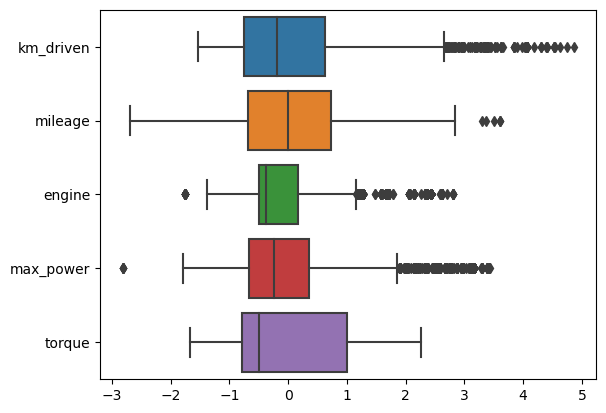

In [1214]:
sns.boxplot(numcols_std, orient = "h")

In [1215]:
# encoding objcols 
# as name column is creating 1000's of columns when we are dummy encoding so,we are dropping name column 
objcols = objcols.drop("name",axis=1)

In [1216]:
objcols_dummy = pd.get_dummies(objcols)

In [1217]:
objcols_dummy.head(2)

,year_1970-01-01,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,True,False,True,False,False,False,True,False,False,True,True,False,False,False,False
1,True,False,True,False,False,False,True,False,False,True,False,False,True,False,False


In [1218]:
objcols_dummy.replace({False:0,True:1},inplace=True)

In [1219]:
objcols_dummy.head(2)

,year_1970-01-01,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,1,0,1,0,0,0,1,0,0,1,1,0,0,0,0
1,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0


In [1220]:
combinedf = pd.concat([numcols_std,objcols_dummy], axis = 1)

In [1221]:
combinedf.head(2)

,km_driven,mileage,engine,max_power,torque,year_1970-01-01,fuel_CNG,fuel_Diesel,fuel_LPG,fuel_Petrol,seller_type_Dealer,seller_type_Individual,seller_type_Trustmark Dealer,transmission_Automatic,transmission_Manual,owner_First Owner,owner_Fourth & Above Owner,owner_Second Owner,owner_Test Drive Car,owner_Third Owner
0,1.730626,1.018159,-0.383146,-0.489883,-0.919393,1,0,1,0,0,0,1,0,0,1,1,0,0,0,0
1,1.158908,0.434639,0.167064,0.438963,-0.919393,1,0,1,0,0,0,1,0,0,1,0,0,1,0,0


<Axes: >

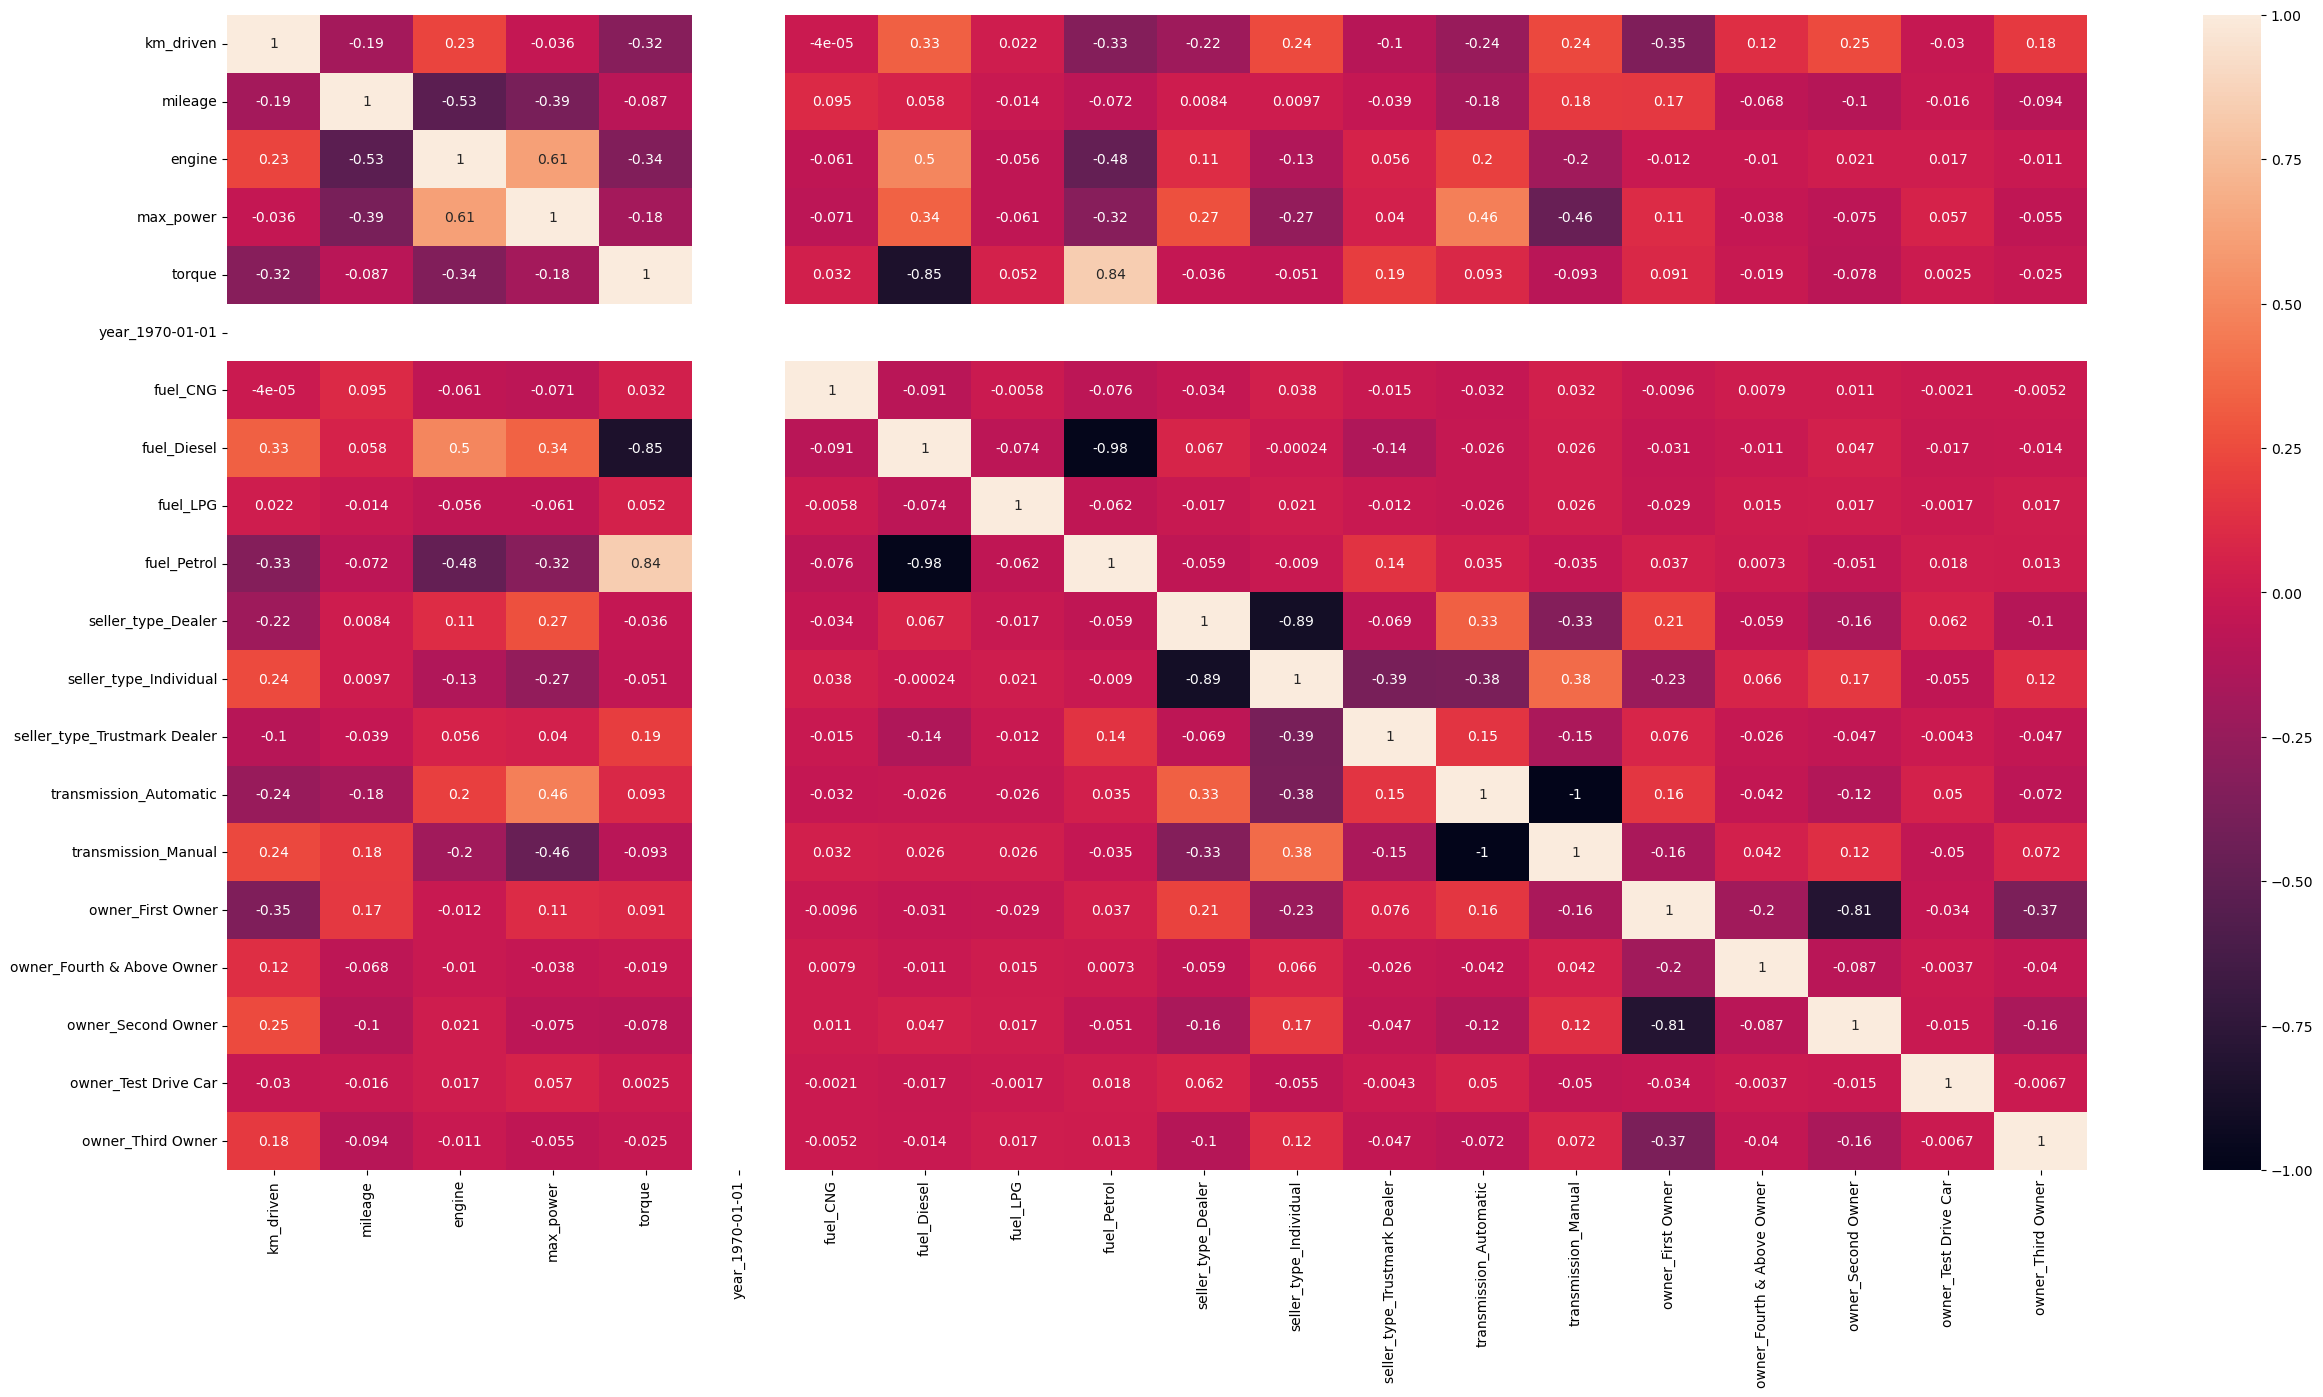

In [1222]:
plt.figure(figsize=(30,15))
sns.heatmap(combinedf.corr(),annot=True)
# there is no multi collinearity

In [1223]:
# Splitting of Data into dependent and independent variables for data modeling 
X = combinedf

In [1224]:
print(y.shape)
print(X.shape)

(8128,)
(8128, 20)


## Model Building :

## Linear Regression:

In [1406]:
from sklearn.linear_model import LinearRegression

In [1407]:
reg = LinearRegression()

In [1408]:
reg_model = reg.fit(X,y)

In [1409]:
# Score says about how well the model fits the training data
reg_model.score(X,y)

0.5751581333504805

In [1410]:
from sklearn.model_selection import cross_val_score

In [1411]:
cross_val_score(reg,X,y)

array([0.55849682, 0.55689654, 0.59573148, 0.55057184, 0.56321839])

In [1412]:
np.mean([0.55849682, 0.55689654, 0.59573148, 0.55057184, 0.56321839])

0.564983014

In [1413]:
reg_predict = reg_model.predict(X)

In [1414]:
# It calculates the residuals, which are the differences between the actual target variable (y) and the predicted values.
reg_residual = y - reg_predict

In [1415]:
# RMSE - It calculates the root mean squared error (RMSE) of the model's predictions. 
# RMSE measures the average magnitude of prediction errors. A lower RMSE indicates better model performance.
np.sqrt(np.mean(reg_residual**2))

525482.7905631115

In [ ]:
# Making predictions on log-transformed data

In [1416]:
rig_model = rig.fit(X,np.log(y))

In [1417]:
rig_model.score(X,np.log(y))

0.7032378332590689

In [1418]:
rig_predict = rig_model.predict(X)

In [1419]:
# Exponentiate the predictions to get back to the original scale
rig_predict = np.exp(rig_predict)

In [1420]:
rig_residual = y - rig_predict

In [1421]:
np.sqrt(np.mean(rig_residual**2)) #RMSE

465421.40858421434

## DecisionTree :

In [1246]:
from sklearn.tree import DecisionTreeRegressor

In [1247]:
tree = DecisionTreeRegressor(max_depth=4)

In [1248]:
treemodel = tree.fit(X,y)

In [1249]:
treemodel.score(X,y)

0.802941863559547

In [1250]:
cross_val_score(tree,X,y)

array([0.76451891, 0.77601672, 0.79256072, 0.71595472, 0.76357088])

In [1251]:
np.mean([0.76451891, 0.77601672, 0.79256072, 0.71595472, 0.76357088])

0.76252439

In [1252]:
treepredict = treemodel.predict(X)

In [1253]:
treeresidual = y - treepredict

In [1254]:
np.sqrt(np.mean(treeresidual**2)) #rmse

357883.79097921663

## RandomForest :

In [1255]:
from sklearn.ensemble import RandomForestRegressor

In [1256]:
ran = RandomForestRegressor(n_estimators=2000,max_depth=4)

In [1257]:
ranmodel = ran.fit(X,y)

In [1258]:
ranmodel.score(X,y)

0.8224345979369216

In [1259]:
cross_val_score(ran,X,y)

array([0.79034118, 0.80231221, 0.83075101, 0.76073553, 0.80567139])

In [1260]:
np.mean([0.79077153, 0.80337313, 0.83116529, 0.76099806, 0.80586582])

0.798434766

In [1261]:
ranpredict = ranmodel.predict(X)

In [1262]:
ranresid = y - ranpredict

In [1263]:
np.sqrt(np.mean(ranresid**2))

339722.2704445976

## GradientBoosting :

In [1264]:
from sklearn.ensemble import GradientBoostingRegressor

In [1265]:
gbr = GradientBoostingRegressor(n_estimators=3000,max_depth=1)

In [1266]:
gbrmodel = gbr.fit(X,y)

In [1267]:
gbrmodel.score(X,y)

0.8372891425732678

In [1268]:
cross_val_score(gbr,X,y)

array([0.79499773, 0.82062348, 0.85996526, 0.75541997, 0.81646935])

In [1269]:
np.mean([0.79499773, 0.82062348, 0.85996526, 0.75541997, 0.81646935])

0.809495158

In [1270]:
gbrpredict  = gbrmodel.predict(X)

In [1271]:
gbrresid = y - gbrpredict

In [1272]:
np.sqrt(np.mean(gbrresid**2)) #RMSE

325201.92688371957

### KNN :

In [1273]:
from sklearn.neighbors import KNeighborsRegressor

In [1274]:
knn = KNeighborsRegressor(n_neighbors=50)

In [1275]:
knnmodel=knn.fit(X,y)

In [1276]:
knnmodel.score(X,y)

0.8433323417156402

In [1277]:
cross_val_score(knn,X,y)

array([0.7601423 , 0.80769162, 0.8237243 , 0.81926664, 0.82147939])

In [1278]:
np.mean([0.7601423 , 0.80769162, 0.8237243 , 0.81926664, 0.82147939])

0.80646085

In [1279]:
knnpredict = knnmodel.predict(X)

In [1280]:
knnresidual = y - knnpredict

In [1281]:
np.sqrt(np.mean(knnresidual**2))

319105.66884402686

## Support Vector Machine :

In [1282]:
from sklearn.svm import LinearSVR

In [1283]:
svr = LinearSVR(C=1000)

In [1284]:
svrmodel = svr.fit(X,y)

C:\Users\venka\anaconda3\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


In [1285]:
svrmodel.score(X,y)

0.4060172100212289

In [1286]:
cross_val_score(svr,X,y)

C:\Users\venka\anaconda3\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\venka\anaconda3\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\venka\anaconda3\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\venka\anaconda3\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\venka\anaconda3\lib\site-packages\sklearn\svm\_clas

array([0.36603657, 0.41845908, 0.39376357, 0.40955352, 0.4132347 ])

In [1287]:
np.mean([0.36590817, 0.41899804, 0.39235535, 0.41063262, 0.41325081])

0.40022899799999995

In [1288]:
svr_predict = svrmodel.predict(X)

In [1289]:
svr_residual = y - svr_predict

In [1290]:
np.sqrt(np.mean(svr_residual**2))

621343.521312164

## Lasso :

In [1291]:
from sklearn.linear_model import Lasso

In [1292]:
las = Lasso(alpha=10)

In [1293]:
lasmodel = las.fit(X,y)

In [1294]:
lasmodel.score(X,y)

0.5751578083712304

In [1295]:
cross_val_score(las,X,y)

array([0.55834602, 0.55685268, 0.59580882, 0.5489337 , 0.56344227])

In [1296]:
np.mean([0.55834602, 0.55685268, 0.59580882, 0.5489337 , 0.56344227])

0.564676698

In [1297]:
laspredict = lasmodel.predict(X)

In [1298]:
lasresid = y-laspredict

In [1299]:
np.sqrt(np.mean(lasresid**2))

525482.9915449166

# ridge

In [1300]:
from sklearn.linear_model import Ridge

In [1301]:
rid = Ridge()

In [1302]:
ridmodel = rid.fit(X,y)

In [1303]:
ridmodel.score(X,y)

0.5750684580847774

In [1304]:
cross_val_score(rid,X,y)

array([0.55842144, 0.55682971, 0.59768228, 0.5492925 , 0.56334599])

In [1305]:
np.mean([0.55842144, 0.55682971, 0.59768228, 0.5492925 , 0.56334599])

0.5651143839999999

In [1306]:
ridpredict = ridmodel.predict(X)

In [1307]:
ridresid = y-ridpredict

In [1308]:
np.sqrt(np.mean(ridresid**2))

525538.2468707013

# Elastic net

In [1309]:
from sklearn.linear_model import ElasticNet

In [1310]:
en = ElasticNet()

In [1311]:
en_model = en.fit(X,y)

In [1312]:
en_model.score(X,y)

0.49533662646883136

In [1313]:
cross_val_score(en,X,y)

array([0.46506015, 0.501377  , 0.50812589, 0.49058843, 0.50070814])

In [1314]:
np.mean([0.46506015, 0.501377  , 0.50812589, 0.49058843, 0.50070814])

0.493171922

In [1315]:
en_predict = en_model.predict(X)

In [1316]:
en_residual = y - en_predict

In [1317]:
np.sqrt(np.mean(en_residual**2))

572724.4668699242

# Summary

After building and evaluating various machine learning models for the Used Cars Prices dataset, we have compiled additional information, including RMSE(Root Mean Square Error), to provide a comprehensive summary. Below is a table summarizing the models, their machine learning scores, r_square, and RMSE values:

| Model Name | R_square| RMSE |
|--|--|--|
| Linear Regression | 0.7032378332590689 | 465421.40858421434| 
| Decision Tree | 0.802941863559547  | 357883.79097921663 |
| Random Forest | 0.8224345979369216 | 339722.2704445976 |
| Gradient Boosting Machine | 0.8372891425732678  | 325201.92688371957 |
| **k-nearest neighbors** | **0.8433323417156402**  | **319105.66884402686** |
| Support Vector Machine | 0.4060172100212289  | 621343.521312164 |
| Lasso Regression | 0.5751578083712304 | 525482.9915449166 |
| Ridge Regression | 0.5750684580847774 | 525538.2468707013 | 
| Elastic Net | 0.49533662646883136  | 572724.4668699242 |

The "k-nearest neighbors" model stands out with a significantly lower RMSE score compared to its counterparts, indicating its superior predictive performance for this dataset. The lower RMSE value suggests that the k-nearest neighbors model yields predictions that are more closely aligned with actual outcomes, which is particularly valuable for regression tasks where numerical prediction accuracy is crucial.

In light of these findings, it's advisable to consider the k-nearest neighbors model as a more reliable option for regression analysis on used cars Prices dataset, prioritizing RMSE as the key performance indicator scores.